In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\hp\Downloads\archive (3)\YoutubeCommentsDataSet.csv")  # update filename if different

print(df.head())
print(df['Sentiment'].value_counts())


                                             Comment Sentiment
0  lets not forget that apple pay in 2014 require...   neutral
1  here in nz 50 of retailers don’t even have con...  negative
2  i will forever acknowledge this channel with t...  positive
3  whenever i go to a place that doesn’t take app...  negative
4  apple pay is so convenient secure and easy to ...  positive
positive    11432
neutral      4638
negative     2338
Name: Sentiment, dtype: int64


positive    11432
neutral      4638
negative     2338
Name: Sentiment, dtype: int64


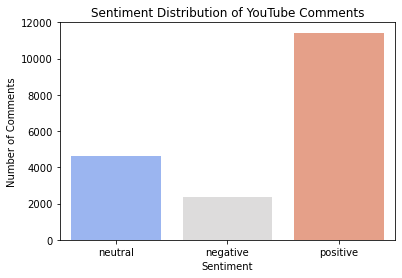

In [10]:
# Check value counts
print(df['Sentiment'].value_counts())

# Plot sentiment distribution
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title("Sentiment Distribution of YouTube Comments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.show()


In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Normalize whitespace
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['Cleaned_Comment'] = df['Comment'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


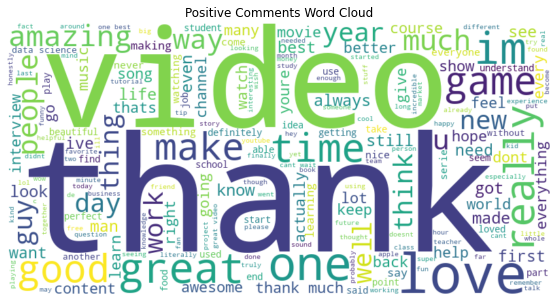

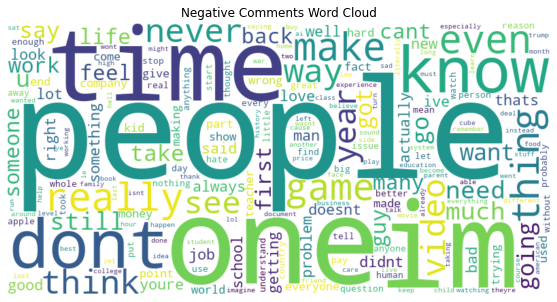

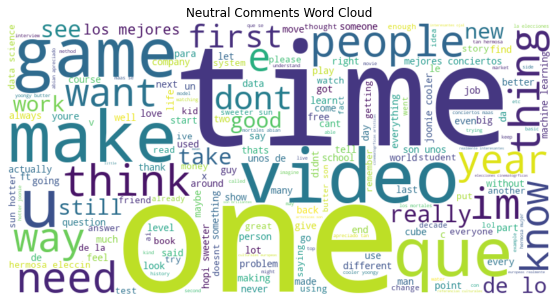

In [12]:
from wordcloud import WordCloud

def show_wordcloud(data, title):
    text = " ".join(comment for comment in data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Generate for each sentiment
show_wordcloud(df[df['Sentiment'] == 'positive']['Cleaned_Comment'], "Positive Comments Word Cloud")
show_wordcloud(df[df['Sentiment'] == 'negative']['Cleaned_Comment'], "Negative Comments Word Cloud")
show_wordcloud(df[df['Sentiment'] == 'neutral']['Cleaned_Comment'], "Neutral Comments Word Cloud")


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Vectorize comments
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Comment'])
y = df['Sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6461162411732754
              precision    recall  f1-score   support

    negative       0.75      0.01      0.01       475
     neutral       0.71      0.18      0.29       937
    positive       0.64      0.97      0.77      2270

    accuracy                           0.65      3682
   macro avg       0.70      0.39      0.36      3682
weighted avg       0.67      0.65      0.55      3682



In [14]:
from collections import Counter

def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

for sentiment in df['Sentiment'].unique():
    print(f"\nTop words in {sentiment} comments:")
    top_words = get_top_n_words(df[df['Sentiment'] == sentiment]['Cleaned_Comment'], 10)
    for word, score in top_words:
        print(f"{word}: {round(score, 2)}")



Top words in neutral comments:
like: 63.0
de: 59.66
one: 50.26
video: 47.63
get: 43.8
que: 43.18
time: 42.1
make: 37.14
know: 37.11
im: 36.99

Top words in negative comments:
like: 42.91
people: 41.04
dont: 37.63
im: 34.78
get: 31.97
one: 31.4
time: 28.82
know: 27.91
would: 27.31
even: 26.38

Top words in positive comments:
love: 306.58
video: 295.18
thank: 211.84
great: 204.28
like: 189.76
im: 183.67
good: 180.66
really: 166.68
one: 166.65
much: 165.89
